In [22]:
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt
# a = pd.read_csv('')

In [100]:
# Define bipolar pairs with consistent casing (e.g. title-case or all upper)
bipolar_pairs = [
    ('EEG Fp1-REF', 'EEG F7-REF'),
    ('EEG F7-REF',  'EEG T3-REF'),
    ('EEG T3-REF',  'EEG T5-REF'),
    ('EEG T5-REF',  'EEG O1-REF'),
    ('EEG Fp1-REF', 'EEG F3-REF'),
    ('EEG F3-REF',  'EEG C3-REF'),
    ('EEG C3-REF',  'EEG P3-REF'),
    ('EEG P3-REF',  'EEG O1-REF'),
    ('EEG Fz-REF',  'EEG Cz-REF'),
    ('EEG Cz-REF',  'EEG Pz-REF'),
    ('EEG Fp2-REF', 'EEG F4-REF'),
    ('EEG F4-REF',  'EEG C4-REF'),
    ('EEG C4-REF',  'EEG P4-REF'),
    ('EEG P4-REF',  'EEG O2-REF'),
    ('EEG Fp2-REF', 'EEG F8-REF'),
    ('EEG F8-REF',  'EEG T4-REF'),
    ('EEG T4-REF',  'EEG T6-REF'),
    ('EEG T6-REF',  'EEG O2-REF'),
]

def normalize_channel(ch):
    return ch.strip().upper()

bipolar_pairs = [(normalize_channel(a), normalize_channel(b)) for a, b in bipolar_pairs]

def make_ch_names(pairs):
    def pretty(ch):
        return ch.replace('EEG ', '').replace('-REF', '').capitalize()
    return [f"{pretty(a)}-{pretty(b)}" for a, b in pairs]

anode = [a for a, _ in bipolar_pairs]
cathode = [b for _, b in bipolar_pairs]
ch_names = make_ch_names(bipolar_pairs)


In [116]:
def getArray(filename: str):
    raw = mne.io.read_raw_edf(filename, preload=True)

    # Convert all channel names to uppercase for consistency
    raw.rename_channels(lambda ch: ch.upper())

    # Drop only if the channels exist
    drop_candidates = ['ECG EKG', 'RESP EFFORT','ECG EKG-REF','RESP EFFORT-REF']
    available = set(raw.ch_names)
    to_drop = [ch for ch in drop_candidates if ch in available]
    if to_drop:
        raw.drop_channels(to_drop)

    # Apply bipolar reference
    raw = mne.set_bipolar_reference(raw, anode=anode, cathode=cathode, ch_name=ch_names, copy=True)

    array = raw.get_data()
    # raw.plot()
    return array


In [ ]:
import os

eeg_set = []
for i in range(1, 80):
    filepath = f'./dataset/eeg{i}.edf'
    if os.path.exists(filepath):
        try:
            eeg = getArray(filepath)
            eeg_set.append(eeg)
        except ValueError as e:
            print(f"Error in file: {filepath}")
            print(e)


In [132]:
len(eeg_set)

79

In [ ]:
a = pd.read_csv('/Users/adityakinjawadekar/Documents/100xcode/py/annotations_2017_A_fixed.csv')
b = pd.read_csv('/Users/adityakinjawadekar/Documents/100xcode/py/annotations_2017_B.csv')
c = pd.read_csv('/Users/adityakinjawadekar/Documents/100xcode/py/annotations_2017_C.csv')



In [130]:
# array = getArray('./dataset/eeg4.edf')
a

,1,2,3,4,5,6,7,8,9,10,...,70,71,72,73,74,75,76,77,78,79
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:

for i in eeg_set:
sz = []
nsz = []
for i in range(len(array[0])):
    if a['1'].iloc[i//256] == 1:
        sz.append(i)
    else:
        nsz.append(i)
        
def calculate_intervals(numbers):
    numbers = sorted(numbers)
    intervals = []
    start = end = numbers[0]

    for num in numbers[1:]:
        if num == end + 1:
            end = num
        else:
            intervals.append([start, end])
            start = end = num

    intervals.append([start, end])  
    return intervals

si = calculate_intervals(sz)
nsi = calculate_intervals(nsz)

# Extract seizure and non-seizure segments for all channels
seizured_segments = []
non_seizured_segments = []

for j in range(len(array)):  # For each channel
    channel_seizure = []
    channel_non_seizure = []
    
    # Process seizure segments
    for interval in si:
        start, end = interval
        if start < len(array[j]) and end < len(array[j]):
            channel_seizure.append(array[j][start:end])
    
    # Process non-seizure segments
    for interval in nsi:
        start, end = interval
        if start < len(array[j]) and end < len(array[j]):
            channel_non_seizure.append(array[j][start:end])
    
    seizured_segments.append(channel_seizure)
    non_seizured_segments.append(channel_non_seizure)

In [133]:
def calculate_intervals(numbers):
    if not numbers:
        return []
    numbers = sorted(numbers)
    intervals = []
    start = end = numbers[0]
    for num in numbers[1:]:
        if num == end + 1:
            end = num
        else:
            intervals.append([start, end])
            start = end = num
    intervals.append([start, end])  
    return intervals

# Store results for all EEG files
all_seizured_segments = []  # List of seizured segments for each file
all_non_seizured_segments = []  # List of non-seizured segments for each file

# Process each EEG file
for file_idx, array in enumerate(eeg_set):
    print(f"Processing file {file_idx + 1}/{len(eeg_set)}")
    
    # Get seizure and non-seizure indices for current file
    sz = []
    nsz = []
    
    for i in range(len(array[0])):
        # Assuming 'a' is your annotation dataframe for the current file
        # You'll need to adjust this based on how your annotations are stored
        if a['1'].iloc[i//256] == 1:  # Seizure
            sz.append(i)
        else:  # Non-seizure
            nsz.append(i)
    
    # Calculate intervals
    si = calculate_intervals(sz)
    nsi = calculate_intervals(nsz)
    
    # Extract seizure and non-seizure segments for all channels in current file
    seizured_segments = []
    non_seizured_segments = []
    
    for j in range(len(array)):  # For each channel
        channel_seizure = []
        channel_non_seizure = []
        
        # Process seizure segments
        for interval in si:
            start, end = interval
            if start < len(array[j]) and end < len(array[j]):
                channel_seizure.append(array[j][start:end+1])  # Include end point
        
        # Process non-seizure segments
        for interval in nsi:
            start, end = interval
            if start < len(array[j]) and end < len(array[j]):
                channel_non_seizure.append(array[j][start:end+1])  # Include end point
        
        seizured_segments.append(channel_seizure)
        non_seizured_segments.append(channel_non_seizure)
    
    # Store results for current file
    all_seizured_segments.append(seizured_segments)
    all_non_seizured_segments.append(non_seizured_segments)

print(f"Processing complete! Processed {len(eeg_set)} files.")
print(f"Structure: all_seizured_segments[file_idx][channel_idx][segment_idx]")

# Optional: Print summary statistics
for file_idx in range(len(all_seizured_segments)):
    seizure_count = sum(len(channel) for channel in all_seizured_segments[file_idx])
    non_seizure_count = sum(len(channel) for channel in all_non_seizured_segments[file_idx])
    print(f"File {file_idx}: {seizure_count} seizure segments, {non_seizure_count} non-seizure segments")

Processing file 1/79
Processing file 2/79
Processing file 3/79
Processing file 4/79
Processing file 5/79
Processing file 6/79
Processing file 7/79
Processing file 8/79
Processing file 9/79
Processing file 10/79
Processing file 11/79
Processing file 12/79
Processing file 13/79
Processing file 14/79
Processing file 15/79
Processing file 16/79
Processing file 17/79
Processing file 18/79
Processing file 19/79


KeyboardInterrupt: 

-12.002308756787391


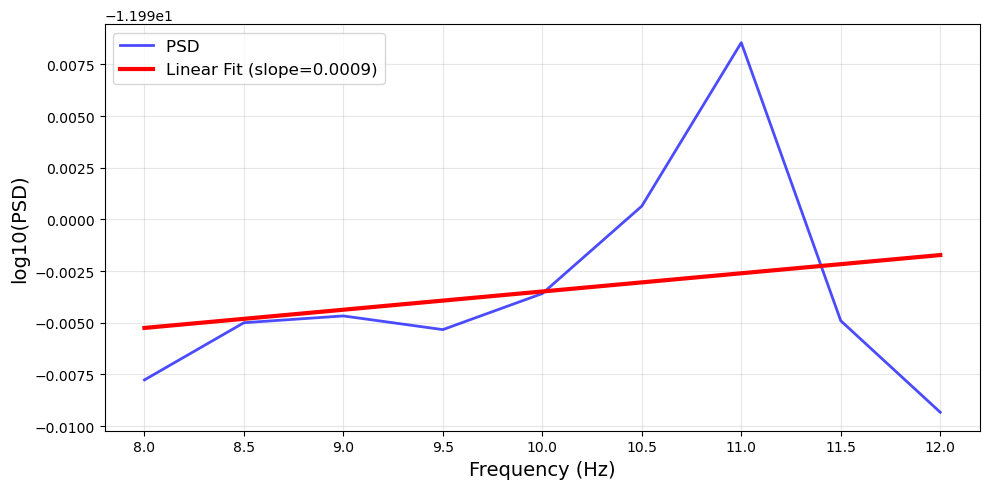

In [41]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, butter, filtfilt

fs = 256
ch = 0   
seg_idx = 0
 
bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 35),
    'Gamma': (35, 100)
}

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

y = seizured_segments[ch][seg_idx]
segment = bandpass_filter(y, 8, 12, 256)

f, Pxx = welch(segment, fs=fs, nperseg=512)

freq_mask = (f >= 8) & (f <= 12)
f_filtered = f[freq_mask]
Pxx_filtered = Pxx[freq_mask]

log_Pxx = np.log10(Pxx_filtered + 1e-12)

model = LinearRegression()
model.fit(f_filtered.reshape(-1, 1), log_Pxx)
slope = model.coef_[0]
intercept = model.intercept_
print(intercept)
fitted_line = model.predict(f_filtered.reshape(-1, 1))

plt.figure(figsize=(10, 5))
plt.plot(f_filtered, log_Pxx, 'b-', alpha=0.7, linewidth=2, label='PSD ')
plt.plot(f_filtered, fitted_line, 'r-', linewidth=3, label=f'Linear Fit (slope={slope:.4f})')
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('log10(PSD)', fontsize=14)
# plt.xlim(8, 12)  
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)


plt.tight_layout()
plt.show()



In [42]:
def get_df(segments, band=(8, 12), fs=256, feature="slope"):
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from scipy.signal import welch, butter, filtfilt
    import pandas as pd

    def bandpass_filter(data, lowcut, highcut, fs, order=4):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        b, a = butter(order, [low, high], btype='band')
        return filtfilt(b, a, data)

    n_channels = len(segments)
    n_segments = len(segments[0])
    values = np.zeros((n_channels, n_segments))

    for ch in range(n_channels):
        for seg_idx in range(n_segments):
            y = segments[ch][seg_idx]
            segment = bandpass_filter(y, band[0], band[1], fs)
            f, Pxx = welch(segment, fs=fs, nperseg=512)
            freq_mask = (f >= band[0]) & (f <= band[1])
            f_filtered = f[freq_mask]
            Pxx_filtered = Pxx[freq_mask]
            log_Pxx = np.log10(Pxx_filtered + 1e-12)
            model = LinearRegression()
            model.fit(f_filtered.reshape(-1, 1), log_Pxx)

            if feature == "slope":
                values[ch, seg_idx] = model.coef_[0]
            elif feature == "intercept":
                values[ch, seg_idx] = model.intercept_
            else:
                raise ValueError("feature must be 'slope' or 'intercept'")

    df_result = pd.DataFrame(values,
                             index=[f'Ch{c+1}' for c in range(n_channels)],
                             columns=[f'Seg{s+1}' for s in range(n_segments)])
    
    return df_result


In [64]:
from scipy.stats import ttest_rel, wilcoxon, pearsonr, spearmanr

nonseiz_trimmed = [channel[:25] for channel in non_seizured_segments]

df_seiz_slope = get_df(seizured_segments, band=(8, 12), feature="slope")
df_nonseiz_slope = get_df(nonseiz_trimmed, band=(8, 12), feature="slope")
df_seiz_intercept = get_df(seizured_segments, band=(8, 12), feature="intercept")
df_nonseiz_intercept = get_df(nonseiz_trimmed, band=(8, 12), feature="intercept")

slope_seiz_flat = df_seiz_slope.values.flatten()
slope_nonseiz_flat = df_nonseiz_slope.values.flatten()

intercept_seiz_flat = df_seiz_intercept.values.flatten()
intercept_nonseiz_flat = df_nonseiz_intercept.values.flatten()

t_slope_stat, t_slope_p = ttest_rel(slope_seiz_flat, slope_nonseiz_flat)
t_intercept_stat, t_intercept_p = ttest_rel(intercept_seiz_flat, intercept_nonseiz_flat)

w_slope_stat, w_slope_p = wilcoxon(slope_seiz_flat, slope_nonseiz_flat)
w_intercept_stat, w_intercept_p = wilcoxon(intercept_seiz_flat, intercept_nonseiz_flat)

pearson_slope_r, pearson_slope_p = pearsonr(slope_seiz_flat, slope_nonseiz_flat)
pearson_intercept_r, pearson_intercept_p = pearsonr(intercept_seiz_flat, intercept_nonseiz_flat)

spearman_slope_r, spearman_slope_p = spearmanr(slope_seiz_flat, slope_nonseiz_flat)
spearman_intercept_r, spearman_intercept_p = spearmanr(intercept_seiz_flat, intercept_nonseiz_flat)

print("Slope Comparison")
print(f"Paired t-test: t = {t_slope_stat:.4f}, p = {t_slope_p:.4e}")
print(f"Pearson correlation: r = {pearson_slope_r:.4f}, p = {pearson_slope_p:.4e}")
print(f"Spearman correlation: rho = {spearman_slope_r:.4f}, p = {spearman_slope_p:.4e}")

print("\n\nIntercept Comparison")
print(f"Paired t-test: t = {t_intercept_stat:.4f}, p = {t_intercept_p:.4e}")
print(f"Pearson correlation: r = {pearson_intercept_r:.4f}, p = {pearson_intercept_p:.4e}")
print(f"Spearman correlation: rho = {spearman_intercept_r:.4f}, p = {spearman_intercept_p:.4e}")


Slope Comparison
Paired t-test: t = 5.3379, p = 1.4959e-07
Pearson correlation: r = 0.0031, p = 9.4815e-01
Spearman correlation: rho = 0.0083, p = 8.6016e-01


Intercept Comparison
Paired t-test: t = -6.6121, p = 1.0783e-10
Pearson correlation: r = 0.0330, p = 4.8513e-01
Spearman correlation: rho = 0.0645, p = 1.7200e-01


In [65]:
df_seiz_slope

,Seg1,Seg2,Seg3,Seg4,Seg5,Seg6,Seg7,Seg8,Seg9,Seg10,...,Seg16,Seg17,Seg18,Seg19,Seg20,Seg21,Seg22,Seg23,Seg24,Seg25
Ch1,0.000882,-0.003711,-0.002825,-0.000475,-0.000720,0.001320,-0.024154,-0.001140,-0.000926,-0.000264,...,0.001418,0.020241,-0.018233,0.005158,-0.013878,0.002173,-0.053650,-0.044324,-0.049128,0.009326
Ch2,0.003232,-0.013008,0.001221,-0.000139,-0.000647,0.000201,-0.017172,-0.001409,-0.000333,-0.000535,...,0.002346,0.007518,-0.033037,0.002754,-0.039411,0.003268,-0.097910,-0.024857,-0.115314,-0.081390
Ch3,0.001482,-0.023599,-0.004891,-0.000793,-0.000599,-0.004922,-0.005845,-0.004675,-0.005834,-0.001391,...,0.003177,-0.009209,-0.007001,-0.006847,-0.046791,0.005947,-0.086812,-0.005166,-0.062219,-0.054788
Ch4,0.003483,-0.025781,-0.003337,-0.000530,-0.000588,-0.002349,-0.000753,-0.009778,-0.005180,-0.000730,...,0.002618,-0.002268,-0.002452,-0.002052,-0.003348,0.009151,-0.010160,-0.002711,-0.021344,-0.036653
Ch5,-0.000552,-0.004970,-0.000800,-0.001229,-0.001133,-0.001697,-0.089340,-0.005746,-0.001517,-0.000100,...,-0.002087,-0.013505,-0.044421,-0.016043,-0.027146,-0.000169,-0.081222,-0.012984,-0.132652,-0.059524
Ch6,0.001517,-0.009547,-0.005898,-0.002383,-0.001179,-0.006961,-0.081033,-0.009515,-0.003904,-0.001155,...,-0.007288,-0.013509,-0.037098,-0.025871,-0.026860,-0.009329,-0.084270,0.004334,-0.127112,-0.082115
Ch7,-0.002566,-0.001277,-0.045114,-0.009622,-0.001685,-0.008286,-0.008274,-0.018127,-0.020193,-0.005132,...,-0.012416,0.012161,-0.007582,-0.027307,-0.016958,-0.000540,-0.044622,-0.003674,-0.021171,0.025762
Ch8,0.001501,-0.003600,-0.065716,-0.001144,-0.000514,-0.004267,-0.010655,-0.007277,-0.024387,-0.001175,...,-0.000291,-0.002450,-0.017506,-0.022963,-0.012505,0.002638,-0.024349,-0.005082,-0.005798,-0.008881
Ch9,-0.015266,-0.035252,-0.027613,-0.031865,-0.003654,-0.036535,-0.033067,-0.076239,-0.002351,-0.004886,...,-0.054779,-0.042185,-0.031435,0.019991,-0.021127,-0.014175,-0.187248,-0.047821,-0.053892,0.016911
Ch10,-0.028848,-0.039793,-0.023263,-0.043498,-0.008110,-0.048801,-0.015974,-0.103584,0.000977,-0.011241,...,-0.087276,-0.020612,-0.031400,0.036754,0.014310,-0.014159,-0.049063,-0.036428,-0.055880,0.036758


In [139]:
def calculate_intervals(numbers):
    if not numbers:
        return []
    numbers = sorted(numbers)
    intervals = []
    start = end = numbers[0]
    for num in numbers[1:]:
        if num == end + 1:
            end = num
        else:
            intervals.append([start, end])
            start = end = num
    intervals.append([start, end])  
    return intervals

# Store results for all EEG files
all_seizured_segments = []  # List of seizured segments for each file
all_non_seizured_segments = []  # List of non-seizured segments for each file

# Process each EEG file
for file_idx, array in enumerate(eeg_set):
    print(f"Processing file {file_idx + 1}/{len(eeg_set)}")
    
    # Get seizure and non-seizure indices for current file
    sz = []
    nsz = []
    
    for i in range(len(array[0])):
        # Assuming 'a' is your annotation dataframe for the current file
        # You'll need to adjust this based on how your annotations are stored
        if a['1'].iloc[i//256] == 1:  # Seizure
            sz.append(i)
        else:  # Non-seizure
            nsz.append(i)
    
    # Calculate intervals
    si = calculate_intervals(sz)
    nsi = calculate_intervals(nsz)
    
    # Extract seizure and non-seizure segments for all channels in current file
    seizured_segments = []
    non_seizured_segments = []
    
    for j in range(len(array)):  # For each channel
        channel_seizure = []
        channel_non_seizure = []
        
        # Process seizure segments
        for interval in si:
            start, end = interval
            if start < len(array[j]) and end < len(array[j]):
                channel_seizure.append(array[j][start:end+1])  # Include end point
        
        # Process non-seizure segments
        for interval in nsi:
            start, end = interval
            if start < len(array[j]) and end < len(array[j]):
                channel_non_seizure.append(array[j][start:end+1])  # Include end point
        
        seizured_segments.append(channel_seizure)
        non_seizured_segments.append(channel_non_seizure)
    
    # Store results for current file
    all_seizured_segments.append(seizured_segments)
    all_non_seizured_segments.append(non_seizured_segments)

print(f"Processing complete! Processed {len(eeg_set)} files.")
print(f"Structure: all_seizured_segments[file_idx][channel_idx][segment_idx]")

def get_df(segments, band=(8, 12), fs=256, feature="slope"):
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from scipy.signal import welch, butter, filtfilt
    import pandas as pd
    
    def bandpass_filter(data, lowcut, highcut, fs, order=4):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        b, a = butter(order, [low, high], btype='band')
        return filtfilt(b, a, data)
    
    if not segments or not segments[0]:  # Handle empty segments
        return pd.DataFrame()
    
    n_channels = len(segments)
    n_segments = len(segments[0])
    values = np.zeros((n_channels, n_segments))
    
    for ch in range(n_channels):
        for seg_idx in range(n_segments):
            y = segments[ch][seg_idx]
            segment = bandpass_filter(y, band[0], band[1], fs)
            f, Pxx = welch(segment, fs=fs, nperseg=512)
            freq_mask = (f >= band[0]) & (f <= band[1])
            f_filtered = f[freq_mask]
            Pxx_filtered = Pxx[freq_mask]
            log_Pxx = np.log10(Pxx_filtered + 1e-12)
            model = LinearRegression()
            model.fit(f_filtered.reshape(-1, 1), log_Pxx)
            if feature == "slope":
                values[ch, seg_idx] = model.coef_[0]
            elif feature == "intercept":
                values[ch, seg_idx] = model.intercept_
            elif feature == "midband":
                # Calculate the value of the fitted line at 10Hz (midband)
                midband_freq = 10.0
                values[ch, seg_idx] = model.predict([[midband_freq]])[0]
            else:
                raise ValueError("feature must be 'slope', 'intercept', or 'midband'")
    
    df_result = pd.DataFrame(values,
                             index=[f'Ch{c+1}' for c in range(n_channels)],
                             columns=[f'Seg{s+1}' for s in range(n_segments)])
    
    return df_result

# Process all files and extract features (slope, intercept, and midband)
all_seizure_features_slope = []  # List of DataFrames for seizure slope features
all_non_seizure_features_slope = []  # List of DataFrames for non-seizure slope features
all_seizure_features_intercept = []  # List of DataFrames for seizure intercept features
all_non_seizure_features_intercept = []  # List of DataFrames for non-seizure intercept features
all_seizure_features_midband = []  # List of DataFrames for seizure midband features
all_non_seizure_features_midband = []  # List of DataFrames for non-seizure midband features

for file_idx in range(len(all_seizured_segments)):
    print(f"Extracting features for file {file_idx + 1}/{len(all_seizured_segments)}")
    
    # Extract slope features
    seizure_slope_df = get_df(all_seizured_segments[file_idx], band=(8, 12), fs=256, feature="slope")
    non_seizure_slope_df = get_df(all_non_seizured_segments[file_idx], band=(8, 12), fs=256, feature="slope")
    all_seizure_features_slope.append(seizure_slope_df)
    all_non_seizure_features_slope.append(non_seizure_slope_df)
    
    # Extract intercept features
    seizure_intercept_df = get_df(all_seizured_segments[file_idx], band=(8, 12), fs=256, feature="intercept")
    non_seizure_intercept_df = get_df(all_non_seizured_segments[file_idx], band=(8, 12), fs=256, feature="intercept")
    all_seizure_features_intercept.append(seizure_intercept_df)
    all_non_seizure_features_intercept.append(non_seizure_intercept_df)
    
    # Extract midband features
    seizure_midband_df = get_df(all_seizured_segments[file_idx], band=(8, 12), fs=256, feature="midband")
    non_seizure_midband_df = get_df(all_non_seizured_segments[file_idx], band=(8, 12), fs=256, feature="midband")
    all_seizure_features_midband.append(seizure_midband_df)
    all_non_seizure_features_midband.append(non_seizure_midband_df)
    
    # Print summary for current file
    seizure_count = seizure_slope_df.shape[1] if not seizure_slope_df.empty else 0
    non_seizure_count = non_seizure_slope_df.shape[1] if not non_seizure_slope_df.empty else 0
    print(f"  File {file_idx}: {seizure_count} seizure segments, {non_seizure_count} non-seizure segments")

print(f"\nFeature extraction complete!")
print(f"Access features: all_seizure_features_slope[file_idx], all_seizure_features_intercept[file_idx], all_seizure_features_midband[file_idx]")
print(f"                all_non_seizure_features_slope[file_idx], all_non_seizure_features_intercept[file_idx], all_non_seizure_features_midband[file_idx]")

# Optional: Combine all features into single DataFrames
print("\nCombining all features...")
combined_seizure_features_slope = []
combined_non_seizure_features_slope = []
combined_seizure_features_intercept = []
combined_non_seizure_features_intercept = []
combined_seizure_features_midband = []
combined_non_seizure_features_midband = []

for file_idx in range(len(all_seizure_features_slope)):
    # Slope features
    if not all_seizure_features_slope[file_idx].empty:
        seizure_slope_df_renamed = all_seizure_features_slope[file_idx].copy()
        seizure_slope_df_renamed.columns = [f'File{file_idx+1}_{col}' for col in seizure_slope_df_renamed.columns]
        combined_seizure_features_slope.append(seizure_slope_df_renamed)
    
    if not all_non_seizure_features_slope[file_idx].empty:
        non_seizure_slope_df_renamed = all_non_seizure_features_slope[file_idx].copy()
        non_seizure_slope_df_renamed.columns = [f'File{file_idx+1}_{col}' for col in non_seizure_slope_df_renamed.columns]
        combined_non_seizure_features_slope.append(non_seizure_slope_df_renamed)
    
    # Intercept features
    if not all_seizure_features_intercept[file_idx].empty:
        seizure_intercept_df_renamed = all_seizure_features_intercept[file_idx].copy()
        seizure_intercept_df_renamed.columns = [f'File{file_idx+1}_{col}' for col in seizure_intercept_df_renamed.columns]
        combined_seizure_features_intercept.append(seizure_intercept_df_renamed)
    
    if not all_non_seizure_features_intercept[file_idx].empty:
        non_seizure_intercept_df_renamed = all_non_seizure_features_intercept[file_idx].copy()
        non_seizure_intercept_df_renamed.columns = [f'File{file_idx+1}_{col}' for col in non_seizure_intercept_df_renamed.columns]
        combined_non_seizure_features_intercept.append(non_seizure_intercept_df_renamed)
    
    # Midband features
    if not all_seizure_features_midband[file_idx].empty:
        seizure_midband_df_renamed = all_seizure_features_midband[file_idx].copy()
        seizure_midband_df_renamed.columns = [f'File{file_idx+1}_{col}' for col in seizure_midband_df_renamed.columns]
        combined_seizure_features_midband.append(seizure_midband_df_renamed)
    
    if not all_non_seizure_features_midband[file_idx].empty:
        non_seizure_midband_df_renamed = all_non_seizure_features_midband[file_idx].copy()
        non_seizure_midband_df_renamed.columns = [f'File{file_idx+1}_{col}' for col in non_seizure_midband_df_renamed.columns]
        combined_non_seizure_features_midband.append(non_seizure_midband_df_renamed)

# Concatenate all files for each feature type
# Slope DataFrames
if combined_seizure_features_slope:
    final_seizure_slope_df = pd.concat(combined_seizure_features_slope, axis=1)
    print(f"Combined seizure slope features shape: {final_seizure_slope_df.shape}")
else:
    final_seizure_slope_df = pd.DataFrame()
    print("No seizure slope features found")

if combined_non_seizure_features_slope:
    final_non_seizure_slope_df = pd.concat(combined_non_seizure_features_slope, axis=1)
    print(f"Combined non-seizure slope features shape: {final_non_seizure_slope_df.shape}")
else:
    final_non_seizure_slope_df = pd.DataFrame()
    print("No non-seizure slope features found")

# Intercept DataFrames
if combined_seizure_features_intercept:
    final_seizure_intercept_df = pd.concat(combined_seizure_features_intercept, axis=1)
    print(f"Combined seizure intercept features shape: {final_seizure_intercept_df.shape}")
else:
    final_seizure_intercept_df = pd.DataFrame()
    print("No seizure intercept features found")

if combined_non_seizure_features_intercept:
    final_non_seizure_intercept_df = pd.concat(combined_non_seizure_features_intercept, axis=1)
    print(f"Combined non-seizure intercept features shape: {final_non_seizure_intercept_df.shape}")
else:
    final_non_seizure_intercept_df = pd.DataFrame()
    print("No non-seizure intercept features found")

# Midband DataFrames
if combined_seizure_features_midband:
    final_seizure_midband_df = pd.concat(combined_seizure_features_midband, axis=1)
    print(f"Combined seizure midband features shape: {final_seizure_midband_df.shape}")
else:
    final_seizure_midband_df = pd.DataFrame()
    print("No seizure midband features found")

if combined_non_seizure_features_midband:
    final_non_seizure_midband_df = pd.concat(combined_non_seizure_features_midband, axis=1)
    print(f"Combined non-seizure midband features shape: {final_non_seizure_midband_df.shape}")
else:
    final_non_seizure_midband_df = pd.DataFrame()
    print("No non-seizure midband features found")

# Statistical Analysis for all files (including midband)
print("\n" + "="*50)
print("STATISTICAL ANALYSIS FOR ALL FILES (INCLUDING MIDBAND)")
print("="*50)

from scipy.stats import ttest_rel, wilcoxon, pearsonr, spearmanr
import numpy as np

# Store results for each file
all_file_results = []

for file_idx in range(len(all_seizured_segments)):
    print(f"\nProcessing statistical analysis for File {file_idx + 1}...")
    
    # Get segments for current file
    seizured_segments_file = all_seizured_segments[file_idx]
    non_seizured_segments_file = all_non_seizured_segments[file_idx]
    
    # Skip if no segments available
    if not seizured_segments_file or not non_seizured_segments_file:
        print(f"  Skipping File {file_idx + 1}: No seizure or non-seizure segments found")
        continue
    
    # Trim non-seizure segments to first 25 per channel
    nonseiz_trimmed = [channel[:25] if len(channel) >= 25 else channel 
                       for channel in non_seizured_segments_file]
    
    # Skip if no segments after trimming
    if not any(len(channel) > 0 for channel in nonseiz_trimmed):
        print(f"  Skipping File {file_idx + 1}: No segments after trimming")
        continue
    
    try:
        # Extract features for all three types
        df_seiz_slope = get_df(seizured_segments_file, band=(8, 12), feature="slope")
        df_nonseiz_slope = get_df(nonseiz_trimmed, band=(8, 12), feature="slope")
        df_seiz_intercept = get_df(seizured_segments_file, band=(8, 12), feature="intercept")
        df_nonseiz_intercept = get_df(nonseiz_trimmed, band=(8, 12), feature="intercept")
        df_seiz_midband = get_df(seizured_segments_file, band=(8, 12), feature="midband")
        df_nonseiz_midband = get_df(nonseiz_trimmed, band=(8, 12), feature="midband")
        
        # Skip if empty DataFrames
        if df_seiz_slope.empty or df_nonseiz_slope.empty:
            print(f"  Skipping File {file_idx + 1}: Empty feature DataFrames")
            continue
        
        # Flatten arrays
        slope_seiz_flat = df_seiz_slope.values.flatten()
        slope_nonseiz_flat = df_nonseiz_slope.values.flatten()
        intercept_seiz_flat = df_seiz_intercept.values.flatten()
        intercept_nonseiz_flat = df_nonseiz_intercept.values.flatten()
        midband_seiz_flat = df_seiz_midband.values.flatten()
        midband_nonseiz_flat = df_nonseiz_midband.values.flatten()
        
        # Ensure equal lengths for paired tests
        min_len = min(len(slope_seiz_flat), len(slope_nonseiz_flat))
        slope_seiz_flat = slope_seiz_flat[:min_len]
        slope_nonseiz_flat = slope_nonseiz_flat[:min_len]
        intercept_seiz_flat = intercept_seiz_flat[:min_len]
        intercept_nonseiz_flat = intercept_nonseiz_flat[:min_len]
        midband_seiz_flat = midband_seiz_flat[:min_len]
        midband_nonseiz_flat = midband_nonseiz_flat[:min_len]
        
        # Perform statistical tests for all three features
        # Slope comparisons
        t_slope_stat, t_slope_p = ttest_rel(slope_seiz_flat, slope_nonseiz_flat)
        w_slope_stat, w_slope_p = wilcoxon(slope_seiz_flat, slope_nonseiz_flat)
        pearson_slope_r, pearson_slope_p = pearsonr(slope_seiz_flat, slope_nonseiz_flat)
        spearman_slope_r, spearman_slope_p = spearmanr(slope_seiz_flat, slope_nonseiz_flat)
        
        # Intercept comparisons
        t_intercept_stat, t_intercept_p = ttest_rel(intercept_seiz_flat, intercept_nonseiz_flat)
        w_intercept_stat, w_intercept_p = wilcoxon(intercept_seiz_flat, intercept_nonseiz_flat)
        pearson_intercept_r, pearson_intercept_p = pearsonr(intercept_seiz_flat, intercept_nonseiz_flat)
        spearman_intercept_r, spearman_intercept_p = spearmanr(intercept_seiz_flat, intercept_nonseiz_flat)
        
        # Midband comparisons
        t_midband_stat, t_midband_p = ttest_rel(midband_seiz_flat, midband_nonseiz_flat)
        w_midband_stat, w_midband_p = wilcoxon(midband_seiz_flat, midband_nonseiz_flat)
        pearson_midband_r, pearson_midband_p = pearsonr(midband_seiz_flat, midband_nonseiz_flat)
        spearman_midband_r, spearman_midband_p = spearmanr(midband_seiz_flat, midband_nonseiz_flat)
        
        # Store results
        file_results = {
            'file_idx': file_idx + 1,
            'n_samples': min_len,
            # Slope results
            'slope_ttest_stat': t_slope_stat,
            'slope_ttest_p': t_slope_p,
            'slope_wilcoxon_stat': w_slope_stat,
            'slope_wilcoxon_p': w_slope_p,
            'slope_pearson_r': pearson_slope_r,
            'slope_pearson_p': pearson_slope_p,
            'slope_spearman_r': spearman_slope_r,
            'slope_spearman_p': spearman_slope_p,
            # Intercept results
            'intercept_ttest_stat': t_intercept_stat,
            'intercept_ttest_p': t_intercept_p,
            'intercept_wilcoxon_stat': w_intercept_stat,
            'intercept_wilcoxon_p': w_intercept_p,
            'intercept_pearson_r': pearson_intercept_r,
            'intercept_pearson_p': pearson_intercept_p,
            'intercept_spearman_r': spearman_intercept_r,
            'intercept_spearman_p': spearman_intercept_p,
            # Midband results
            'midband_ttest_stat': t_midband_stat,
            'midband_ttest_p': t_midband_p,
            'midband_wilcoxon_stat': w_midband_stat,
            'midband_wilcoxon_p': w_midband_p,
            'midband_pearson_r': pearson_midband_r,
            'midband_pearson_p': pearson_midband_p,
            'midband_spearman_r': spearman_midband_r,
            'midband_spearman_p': spearman_midband_p
        }
        
        all_file_results.append(file_results)
        
        # Print results for current file
        print(f"\n--- File {file_idx + 1} Results (n={min_len}) ---")
        print("Slope Comparison:")
        print(f"  Paired t-test: t = {t_slope_stat:.4f}, p = {t_slope_p:.4e}")
        print(f"  Wilcoxon test: W = {w_slope_stat:.4f}, p = {w_slope_p:.4e}")
        print(f"  Pearson correlation: r = {pearson_slope_r:.4f}, p = {pearson_slope_p:.4e}")
        print(f"  Spearman correlation: rho = {spearman_slope_r:.4f}, p = {spearman_slope_p:.4e}")
        
        print("\nIntercept Comparison:")
        print(f"  Paired t-test: t = {t_intercept_stat:.4f}, p = {t_intercept_p:.4e}")
        print(f"  Wilcoxon test: W = {w_intercept_stat:.4f}, p = {w_intercept_p:.4e}")
        print(f"  Pearson correlation: r = {pearson_intercept_r:.4f}, p = {pearson_intercept_p:.4e}")
        print(f"  Spearman correlation: rho = {spearman_intercept_r:.4f}, p = {spearman_intercept_p:.4e}")
        
        print("\nMidband (10Hz) Comparison:")
        print(f"  Paired t-test: t = {t_midband_stat:.4f}, p = {t_midband_p:.4e}")
        print(f"  Wilcoxon test: W = {w_midband_stat:.4f}, p = {w_midband_p:.4e}")
        print(f"  Pearson correlation: r = {pearson_midband_r:.4f}, p = {pearson_midband_p:.4e}")
        print(f"  Spearman correlation: rho = {spearman_midband_r:.4f}, p = {spearman_midband_p:.4e}")
        
    except Exception as e:
        print(f"  Error processing File {file_idx + 1}: {str(e)}")
        continue

# Create summary DataFrame
if all_file_results:
    results_df = pd.DataFrame(all_file_results)
    
    # print(f"\n" + "="*50)
    # print("SUMMARY STATISTICS ACROSS ALL FILES (INCLUDING MIDBAND)")
    # print("="*50)
    # print(f"Successfully processed {len(all_file_results)} files")
    
    # # Summary statistics for p-values
    # print("\nSlope Analysis - Significant Results (p < 0.05):")
    # print(f"  T-test: {(results_df['slope_ttest_p'] < 0.05).sum()}/{len(results_df)} files")
    # print(f"  Wilcoxon: {(results_df['slope_wilcoxon_p'] < 0.05).sum()}/{len(results_df)} files")
    # print(f"  Pearson: {(results_df['slope_pearson_p'] < 0.05).sum()}/{len(results_df)} files")
    # print(f"  Spearman: {(results_df['slope_spearman_p'] < 0.05).sum()}/{len(results_df)} files")
    
    # print("\nIntercept Analysis - Significant Results (p < 0.05):")
    # print(f"  T-test: {(results_df['intercept_ttest_p'] < 0.05).sum()}/{len(results_df)} files")
    # print(f"  Wilcoxon: {(results_df['intercept_wilcoxon_p'] < 0.05).sum()}/{len(results_df)} files")
    # print(f"  Pearson: {(results_df['intercept_pearson_p'] < 0.05).sum()}/{len(results_df)} files")
    # print(f"  Spearman: {(results_df['intercept_spearman_p'] < 0.05).sum()}/{len(results_df)} files")
    
    # print("\nMidband (10Hz) Analysis - Significant Results (p < 0.05):")
    # print(f"  T-test: {(results_df['midband_ttest_p'] < 0.05).sum()}/{len(results_df)} files")
    # print(f"  Wilcoxon: {(results_df['midband_wilcoxon_p'] < 0.05).sum()}/{len(results_df)} files")
    # print(f"  Pearson: {(results_df['midband_pearson_p'] < 0.05).sum()}/{len(results_df)} files")
    # print(f"  Spearman: {(results_df['midband_spearman_p'] < 0.05).sum()}/{len(results_df)} files")
    
    # # Mean correlation coefficients
    # print(f"\nMean Correlation Coefficients:")
    # print(f"  Slope Pearson r: {results_df['slope_pearson_r'].mean():.4f} ± {results_df['slope_pearson_r'].std():.4f}")
    # print(f"  Slope Spearman rho: {results_df['slope_spearman_r'].mean():.4f} ± {results_df['slope_spearman_r'].std():.4f}")
    # print(f"  Intercept Pearson r: {results_df['intercept_pearson_r'].mean():.4f} ± {results_df['intercept_pearson_r'].std():.4f}")
    # print(f"  Intercept Spearman rho: {results_df['intercept_spearman_r'].mean():.4f} ± {results_df['intercept_spearman_r'].std():.4f}")
    # print(f"  Midband Pearson r: {results_df['midband_pearson_r'].mean():.4f} ± {results_df['midband_pearson_r'].std():.4f}")
    # print(f"  Midband Spearman rho: {results_df['midband_spearman_r'].mean():.4f} ± {results_df['midband_spearman_r'].std():.4f}")
    
   

Processing file 1/79
Processing file 2/79
Processing file 3/79
Processing file 4/79
Processing file 5/79
Processing file 6/79
Processing file 7/79
Processing file 8/79
Processing file 9/79
Processing file 10/79
Processing file 11/79
Processing file 12/79
Processing file 13/79
Processing file 14/79
Processing file 15/79
Processing file 16/79
Processing file 17/79
Processing file 18/79
Processing file 19/79
Processing file 20/79
Processing file 21/79
Processing file 22/79
Processing file 23/79
Processing file 24/79
Processing file 25/79
Processing file 26/79
Processing file 27/79
Processing file 28/79
Processing file 29/79
Processing file 30/79
Processing file 31/79
Processing file 32/79
Processing file 33/79
Processing file 34/79
Processing file 35/79
Processing file 36/79
Processing file 37/79
Processing file 38/79
Processing file 39/79
Processing file 40/79
Processing file 41/79
Processing file 42/79
Processing file 43/79
Processing file 44/79
Processing file 45/79
Processing file 46/

In [148]:
results = results_df.drop(['n_samples','slope_wilcoxon_stat','slope_wilcoxon_p','intercept_wilcoxon_stat','intercept_wilcoxon_p','midband_wilcoxon_p','midband_wilcoxon_stat'], axis = 1)

In [149]:
results.columns

Index(['file_idx', 'slope_ttest_stat', 'slope_ttest_p', 'slope_pearson_r',
       'slope_pearson_p', 'slope_spearman_r', 'slope_spearman_p',
       'intercept_ttest_stat', 'intercept_ttest_p', 'intercept_pearson_r',
       'intercept_pearson_p', 'intercept_spearman_r', 'intercept_spearman_p',
       'midband_ttest_stat', 'midband_ttest_p', 'midband_pearson_r',
       'midband_pearson_p', 'midband_spearman_r', 'midband_spearman_p'],
      dtype='object')

In [150]:
results

,file_idx,slope_ttest_stat,slope_ttest_p,slope_pearson_r,slope_pearson_p,slope_spearman_r,slope_spearman_p,intercept_ttest_stat,intercept_ttest_p,intercept_pearson_r,intercept_pearson_p,intercept_spearman_r,intercept_spearman_p,midband_ttest_stat,midband_ttest_p,midband_pearson_r,midband_pearson_p,midband_spearman_r,midband_spearman_p
0,1,5.480764,7.073666e-08,0.004870,9.179386e-01,0.011082,8.146514e-01,-6.779599,3.805773e-11,0.035815,4.485225e-01,0.065322,1.665665e-01,-6.918815,1.577100e-11,0.052577,2.657104e-01,0.173893,2.098627e-04
1,2,1.722567,8.669392e-02,0.072063,3.363808e-01,0.071640,3.392314e-01,-2.299656,2.262203e-02,0.064944,3.864034e-01,0.083241,2.665910e-01,-2.708584,7.412947e-03,0.163486,2.831558e-02,0.194284,8.965130e-03
2,3,1.661015,9.805547e-02,-0.010525,8.727678e-01,0.180980,5.493024e-03,-2.496947,1.321853e-02,0.080315,2.209586e-01,0.308454,1.501774e-06,-4.476685,1.186825e-05,0.335241,1.491878e-07,0.492535,1.054486e-15
3,4,-0.840695,4.016404e-01,0.079276,2.901244e-01,-0.010268,8.911881e-01,0.523663,6.011605e-01,0.131773,7.784958e-02,0.053269,4.775765e-01,-0.124705,9.008974e-01,0.035361,6.374516e-01,0.040398,5.902700e-01
4,5,0.168239,8.665848e-01,0.142296,5.671480e-02,0.103028,1.687290e-01,-2.237846,2.646412e-02,0.231006,1.808598e-03,0.198986,7.408400e-03,-3.712839,2.735536e-04,0.171604,2.125719e-02,0.200765,6.884982e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,75,1.122073,2.631974e-01,0.056572,4.285718e-01,0.130976,6.587811e-02,-0.764951,4.452160e-01,0.062066,3.850371e-01,0.130254,6.739566e-02,0.799808,4.247853e-01,0.162839,2.189661e-02,0.214847,2.368958e-03
75,76,0.129378,8.972039e-01,0.170068,2.246227e-02,0.092861,2.150269e-01,-0.105950,9.157404e-01,0.239459,1.205700e-03,0.153110,4.017106e-02,-0.031478,9.749235e-01,0.314668,1.691906e-05,0.303612,3.424380e-05
76,77,0.248256,8.041735e-01,0.078567,2.502372e-01,0.162949,1.652997e-02,0.141188,8.878533e-01,0.045826,5.028877e-01,0.083501,2.216250e-01,1.004630,3.162045e-01,0.541536,7.389387e-18,0.579083,9.726348e-21
77,78,0.047762,9.619370e-01,0.425670,6.735009e-15,0.470815,2.751558e-18,-0.988002,3.239346e-01,0.499548,1.015051e-20,0.445019,2.737059e-16,-3.103406,2.092352e-03,0.632911,1.180967e-35,0.515130,3.870782e-22


In [166]:
import numpy as np
import pandas as pd
from scipy.signal import welch, butter, filtfilt
from scipy.stats import ttest_rel, pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

def calculate_intervals(numbers):
    if not numbers:
        return []
    numbers = sorted(numbers)
    intervals = []
    start = end = numbers[0]
    for num in numbers[1:]:
        if num == end + 1:
            end = num
        else:
            intervals.append([start, end])
            start = end = num
    intervals.append([start, end])  
    return intervals

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def extract_spectral_features(segments, band=(8, 12), fs=256, feature="slope"):
    if not segments or not segments[0]:
        return pd.DataFrame()
    
    n_channels = len(segments)
    n_segments = len(segments[0])
    values = np.zeros((n_channels, n_segments))
    
    for ch in range(n_channels):
        for seg_idx in range(n_segments):
            y = segments[ch][seg_idx]
            segment = bandpass_filter(y, band[0], band[1], fs)
            f, Pxx = welch(segment, fs=fs, nperseg=512)
            freq_mask = (f >= band[0]) & (f <= band[1])
            f_filtered = f[freq_mask]
            Pxx_filtered = Pxx[freq_mask]
            log_Pxx = np.log10(Pxx_filtered + 1e-12)
            model = LinearRegression()
            model.fit(f_filtered.reshape(-1, 1), log_Pxx)
            
            if feature == "slope":
                values[ch, seg_idx] = model.coef_[0]
            elif feature == "intercept":
                values[ch, seg_idx] = model.intercept_
            elif feature == "midband":
                midband_freq = 10.0
                values[ch, seg_idx] = model.predict([[midband_freq]])[0]
            else:
                raise ValueError("feature must be 'slope', 'intercept', or 'midband'")
    
    df_result = pd.DataFrame(values,
                             index=[f'Ch{c+1}' for c in range(n_channels)],
                             columns=[f'Seg{s+1}' for s in range(n_segments)])
    
    return df_result

def process_patient_data(patient_idx, eeg_array, annotation_df, fs=256):
    print(f"Processing Patient {patient_idx + 1}/79...")
    
    sz = []
    nsz = []
    
    for i in range(len(eeg_array[0])):
        annotation_idx = i // fs
        if annotation_idx < len(annotation_df) and annotation_df['1'].iloc[annotation_idx] == 1:
            sz.append(i)
        else:
            nsz.append(i)
    
    seizure_intervals = calculate_intervals(sz)
    non_seizure_intervals = calculate_intervals(nsz)
    
    print(f"  Found {len(seizure_intervals)} seizure intervals, {len(non_seizure_intervals)} non-seizure intervals")
    
    seizure_segments = []
    non_seizure_segments = []
    
    for ch in range(len(eeg_array)):
        channel_seizure = []
        channel_non_seizure = []
        
        for start, end in seizure_intervals:
            if start < len(eeg_array[ch]) and end < len(eeg_array[ch]):
                channel_seizure.append(eeg_array[ch][start:end+1])
        
        for start, end in non_seizure_intervals:
            if start < len(eeg_array[ch]) and end < len(eeg_array[ch]):
                channel_non_seizure.append(eeg_array[ch][start:end+1])
        
        seizure_segments.append(channel_seizure)
        non_seizure_segments.append(channel_non_seizure)
    
    min_segments_per_channel = min(
        min(len(ch_seiz) for ch_seiz in seizure_segments) if seizure_segments else 0,
        min(len(ch_nonseiz) for ch_nonseiz in non_seizure_segments) if non_seizure_segments else 0
    )
    
    if min_segments_per_channel == 0:
        print(f"  Warning: Patient {patient_idx + 1} has no balanced segments")
        return None
    
    balanced_seizure_segments = [ch[:min_segments_per_channel] for ch in seizure_segments]
    balanced_non_seizure_segments = [ch[:min_segments_per_channel] for ch in non_seizure_segments]
    
    print(f"  Balanced to {min_segments_per_channel} segments per channel per class")
    
    try:
        seizure_slope = extract_spectral_features(balanced_seizure_segments, feature="slope")
        non_seizure_slope = extract_spectral_features(balanced_non_seizure_segments, feature="slope")
        seizure_intercept = extract_spectral_features(balanced_seizure_segments, feature="intercept")
        non_seizure_intercept = extract_spectral_features(balanced_non_seizure_segments, feature="intercept")
        seizure_midband = extract_spectral_features(balanced_seizure_segments, feature="midband")
        non_seizure_midband = extract_spectral_features(balanced_non_seizure_segments, feature="midband")
        
        patient_data = {
            'patient_id': patient_idx + 1,
            'n_segments_per_class': min_segments_per_channel,
            'seizure_slope': seizure_slope,
            'non_seizure_slope': non_seizure_slope,
            'seizure_intercept': seizure_intercept,
            'non_seizure_intercept': non_seizure_intercept,
            'seizure_midband': seizure_midband,
            'non_seizure_midband': non_seizure_midband
        }
        
        return patient_data
        
    except Exception as e:
        print(f"  Error extracting features for Patient {patient_idx + 1}: {str(e)}")
        return None

def perform_statistical_analysis(patient_data):
    if patient_data is None:
        return None
    
    patient_id = patient_data['patient_id']
    results = {'patient_id': patient_id, 'n_segments': patient_data['n_segments_per_class']}
    
    feature_types = ['slope', 'intercept', 'midband']
    
    for feature in feature_types:
        seizure_df = patient_data[f'seizure_{feature}']
        non_seizure_df = patient_data[f'non_seizure_{feature}']
        
        if seizure_df.empty or non_seizure_df.empty:
            continue
        
        seizure_values = seizure_df.values
        non_seizure_values = non_seizure_df.values
        
        n_channels, n_segments = seizure_values.shape
        
        for seg in range(n_segments):
            seizure_segment = seizure_values[:, seg]
            non_seizure_segment = non_seizure_values[:, seg]
            
            try:
                t_stat, t_p = ttest_rel(seizure_segment, non_seizure_segment)
                pearson_r, pearson_p = pearsonr(seizure_segment, non_seizure_segment)
                spearman_r, spearman_p = spearmanr(seizure_segment, non_seizure_segment)
                
                key_prefix = f'{feature}_seg{seg+1}'
                results[f'{key_prefix}_ttest_stat'] = t_stat
                results[f'{key_prefix}_ttest_p'] = t_p
                results[f'{key_prefix}_pearson_r'] = pearson_r
                results[f'{key_prefix}_pearson_p'] = pearson_p
                results[f'{key_prefix}_spearman_r'] = spearman_r
                results[f'{key_prefix}_spearman_p'] = spearman_p
                
            except Exception as e:
                print(f"  Error in statistical analysis for {feature} Seg{seg+1} in Patient {patient_id}: {str(e)}")
                continue
        
        seizure_flat = seizure_values.flatten()
        non_seizure_flat = non_seizure_values.flatten()
        
        try:
            t_stat, t_p = ttest_rel(seizure_flat, non_seizure_flat)
            pearson_r, pearson_p = pearsonr(seizure_flat, non_seizure_flat)
            spearman_r, spearman_p = spearmanr(seizure_flat, non_seizure_flat)
            
            results[f'{feature}_overall_ttest_stat'] = t_stat
            results[f'{feature}_overall_ttest_p'] = t_p
            results[f'{feature}_overall_pearson_r'] = pearson_r
            results[f'{feature}_overall_pearson_p'] = pearson_p
            results[f'{feature}_overall_spearman_r'] = spearman_r
            results[f'{feature}_overall_spearman_p'] = spearman_p
            
        except Exception as e:
            print(f"  Error in overall statistical analysis for {feature} in Patient {patient_id}: {str(e)}")
            continue
    
    return results

def process_all_patients(eeg_set, annotation_df):
    patient_dataframes = []
    statistical_results = []
    
    print("Starting processing of 79 patients...")
    print("="*60)
    
    for patient_idx in range(len(eeg_set)):
        patient_data = process_patient_data(
            patient_idx, 
            eeg_set[patient_idx], 
            annotation_df
        )
        
        if patient_data is not None:
            patient_dataframes.append(patient_data)
            
            stats = perform_statistical_analysis(patient_data)
            if stats is not None:
                statistical_results.append(stats)
                
                print(f"  Patient {patient_idx + 1}: {patient_data['n_segments_per_class']} segments per class")
                if 'slope_overall_ttest_p' in stats:
                    print(f"    Slope overall t-test p-value: {stats['slope_overall_ttest_p']:.4e}")
                    print(f"    Slope overall Pearson r: {stats['slope_overall_pearson_r']:.4f}")
            else:
                print(f"  Patient {patient_idx + 1}: Statistical analysis failed")
        else:
            print(f"  Patient {patient_idx + 1}: Data processing failed")
        
        print()
    
    if statistical_results:
        summary_df = pd.DataFrame(statistical_results)
        
        print("="*60)
        print("SUMMARY STATISTICS ACROSS ALL PATIENTS")
        print("="*60)
        print(f"Successfully processed {len(statistical_results)} patients")
        
        for feature in ['slope', 'intercept', 'midband']:
            if f'{feature}_overall_ttest_p' in summary_df.columns:
                significant_count = (summary_df[f'{feature}_overall_ttest_p'] < 0.05).sum()
                total_count = len(summary_df)
                mean_r = summary_df[f'{feature}_overall_pearson_r'].mean()
                
                print(f"\n{feature.upper()} Analysis:")
                print(f"  Significant overall t-tests (p < 0.05): {significant_count}/{total_count} patients")
                print(f"  Mean overall Pearson correlation: {mean_r:.4f} ± {summary_df[f'{feature}_overall_pearson_r'].std():.4f}")
        
        return patient_dataframes, summary_df
    else:
        print("No patients processed successfully")
        return [], pd.DataFrame()

patient_dataframes, summary_statistics = process_all_patients(eeg_set, a)

print("Code ready! Load your annotation file and call:")
print("patient_dataframes, summary_statistics = process_all_patients(eeg_set, a)")

Starting processing of 79 patients...
Processing Patient 1/79...
  Found 25 seizure intervals, 26 non-seizure intervals
  Balanced to 25 segments per channel per class
  Patient 1: 25 segments per class
    Slope overall t-test p-value: 7.0737e-08
    Slope overall Pearson r: 0.0049

Processing Patient 2/79...
  Found 10 seizure intervals, 11 non-seizure intervals
  Balanced to 10 segments per channel per class
  Patient 2: 10 segments per class
    Slope overall t-test p-value: 1.8981e-01
    Slope overall Pearson r: 0.4533

Processing Patient 3/79...
  Found 13 seizure intervals, 13 non-seizure intervals
  Balanced to 13 segments per channel per class
  Patient 3: 13 segments per class
    Slope overall t-test p-value: 9.8055e-02
    Slope overall Pearson r: -0.0105

Processing Patient 4/79...
  Found 10 seizure intervals, 11 non-seizure intervals
  Balanced to 10 segments per channel per class
  Patient 4: 10 segments per class
    Slope overall t-test p-value: 2.2595e-01
    Slope 

/var/folders/hj/j2dh1j5j17lbls6g5f9jsnzh0000gn/T/ipykernel_29757/3926287437.py:167: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, pearson_p = pearsonr(seizure_segment, non_seizure_segment)
/var/folders/hj/j2dh1j5j17lbls6g5f9jsnzh0000gn/T/ipykernel_29757/3926287437.py:168: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(seizure_segment, non_seizure_segment)


  Patient 17: 18 segments per class
    Slope overall t-test p-value: 5.7160e-01
    Slope overall Pearson r: 0.3643

Processing Patient 18/79...
  Found 10 seizure intervals, 11 non-seizure intervals
  Balanced to 10 segments per channel per class
  Patient 18: 10 segments per class
    Slope overall t-test p-value: 3.3814e-01
    Slope overall Pearson r: 0.6108

Processing Patient 19/79...
  Found 25 seizure intervals, 26 non-seizure intervals
  Balanced to 25 segments per channel per class
  Patient 19: 25 segments per class
    Slope overall t-test p-value: 8.5627e-01
    Slope overall Pearson r: 0.6198

Processing Patient 20/79...
  Found 11 seizure intervals, 12 non-seizure intervals
  Balanced to 11 segments per channel per class
  Patient 20: 11 segments per class
    Slope overall t-test p-value: 3.5513e-02
    Slope overall Pearson r: 0.1025

Processing Patient 21/79...
  Found 19 seizure intervals, 20 non-seizure intervals
  Balanced to 19 segments per channel per class
  Pa

/var/folders/hj/j2dh1j5j17lbls6g5f9jsnzh0000gn/T/ipykernel_29757/3926287437.py:167: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, pearson_p = pearsonr(seizure_segment, non_seizure_segment)
/var/folders/hj/j2dh1j5j17lbls6g5f9jsnzh0000gn/T/ipykernel_29757/3926287437.py:168: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(seizure_segment, non_seizure_segment)


  Patient 46: 17 segments per class
    Slope overall t-test p-value: 7.2030e-01
    Slope overall Pearson r: 0.1230

Processing Patient 47/79...
  Found 10 seizure intervals, 11 non-seizure intervals
  Balanced to 10 segments per channel per class
  Patient 47: 10 segments per class
    Slope overall t-test p-value: 2.1630e-01
    Slope overall Pearson r: 0.1008

Processing Patient 48/79...
  Found 10 seizure intervals, 11 non-seizure intervals
  Balanced to 10 segments per channel per class
  Patient 48: 10 segments per class
    Slope overall t-test p-value: 3.8476e-02
    Slope overall Pearson r: 0.7165

Processing Patient 49/79...
  Found 25 seizure intervals, 26 non-seizure intervals
  Balanced to 25 segments per channel per class


/var/folders/hj/j2dh1j5j17lbls6g5f9jsnzh0000gn/T/ipykernel_29757/3926287437.py:167: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, pearson_p = pearsonr(seizure_segment, non_seizure_segment)
/var/folders/hj/j2dh1j5j17lbls6g5f9jsnzh0000gn/T/ipykernel_29757/3926287437.py:168: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(seizure_segment, non_seizure_segment)


  Patient 49: 25 segments per class
    Slope overall t-test p-value: 1.6851e-05
    Slope overall Pearson r: 0.3300

Processing Patient 50/79...
  Found 25 seizure intervals, 26 non-seizure intervals
  Balanced to 25 segments per channel per class


/var/folders/hj/j2dh1j5j17lbls6g5f9jsnzh0000gn/T/ipykernel_29757/3926287437.py:167: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, pearson_p = pearsonr(seizure_segment, non_seizure_segment)
/var/folders/hj/j2dh1j5j17lbls6g5f9jsnzh0000gn/T/ipykernel_29757/3926287437.py:168: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(seizure_segment, non_seizure_segment)


  Patient 50: 25 segments per class
    Slope overall t-test p-value: 1.7722e-05
    Slope overall Pearson r: 0.1018

Processing Patient 51/79...
  Found 3 seizure intervals, 4 non-seizure intervals
  Balanced to 3 segments per channel per class
  Patient 51: 3 segments per class
    Slope overall t-test p-value: 7.4014e-01
    Slope overall Pearson r: 0.7387

Processing Patient 52/79...
  Found 11 seizure intervals, 12 non-seizure intervals
  Balanced to 11 segments per channel per class
  Patient 52: 11 segments per class
    Slope overall t-test p-value: 4.2371e-01
    Slope overall Pearson r: 0.6315

Processing Patient 53/79...
  Found 10 seizure intervals, 11 non-seizure intervals
  Balanced to 10 segments per channel per class
  Patient 53: 10 segments per class
    Slope overall t-test p-value: 1.0882e-02
    Slope overall Pearson r: 0.4403

Processing Patient 54/79...
  Found 12 seizure intervals, 13 non-seizure intervals
  Balanced to 12 segments per channel per class
  Patien

/var/folders/hj/j2dh1j5j17lbls6g5f9jsnzh0000gn/T/ipykernel_29757/3926287437.py:167: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, pearson_p = pearsonr(seizure_segment, non_seizure_segment)
/var/folders/hj/j2dh1j5j17lbls6g5f9jsnzh0000gn/T/ipykernel_29757/3926287437.py:168: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(seizure_segment, non_seizure_segment)


  Patient 56: 10 segments per class
    Slope overall t-test p-value: 9.3494e-02
    Slope overall Pearson r: 0.3849

Processing Patient 57/79...
  Found 9 seizure intervals, 10 non-seizure intervals
  Balanced to 9 segments per channel per class
  Patient 57: 9 segments per class
    Slope overall t-test p-value: 5.4930e-01
    Slope overall Pearson r: 0.4698

Processing Patient 58/79...
  Found 14 seizure intervals, 15 non-seizure intervals
  Balanced to 14 segments per channel per class
  Patient 58: 14 segments per class
    Slope overall t-test p-value: 4.5662e-01
    Slope overall Pearson r: 0.4391

Processing Patient 59/79...
  Found 11 seizure intervals, 12 non-seizure intervals
  Balanced to 11 segments per channel per class
  Patient 59: 11 segments per class
    Slope overall t-test p-value: 4.2232e-01
    Slope overall Pearson r: 0.3413

Processing Patient 60/79...
  Found 10 seizure intervals, 11 non-seizure intervals
  Balanced to 10 segments per channel per class
  Patie

/var/folders/hj/j2dh1j5j17lbls6g5f9jsnzh0000gn/T/ipykernel_29757/3926287437.py:167: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, pearson_p = pearsonr(seizure_segment, non_seizure_segment)
/var/folders/hj/j2dh1j5j17lbls6g5f9jsnzh0000gn/T/ipykernel_29757/3926287437.py:168: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = spearmanr(seizure_segment, non_seizure_segment)


  Patient 72: 17 segments per class
    Slope overall t-test p-value: 6.1485e-04
    Slope overall Pearson r: -0.0108

Processing Patient 73/79...
  Found 10 seizure intervals, 11 non-seizure intervals
  Balanced to 10 segments per channel per class
  Patient 73: 10 segments per class
    Slope overall t-test p-value: 1.9927e-01
    Slope overall Pearson r: 0.5629

Processing Patient 74/79...
  Found 12 seizure intervals, 13 non-seizure intervals
  Balanced to 12 segments per channel per class
  Patient 74: 12 segments per class
    Slope overall t-test p-value: 5.5490e-01
    Slope overall Pearson r: 0.2483

Processing Patient 75/79...
  Found 11 seizure intervals, 12 non-seizure intervals
  Balanced to 11 segments per channel per class
  Patient 75: 11 segments per class
    Slope overall t-test p-value: 1.8088e-01
    Slope overall Pearson r: 0.5688

Processing Patient 76/79...
  Found 10 seizure intervals, 11 non-seizure intervals
  Balanced to 10 segments per channel per class
  P

In [167]:
patient_dataframes

[{'patient_id': 1,
  'n_segments_per_class': 25,
  'seizure_slope':           Seg1      Seg2      Seg3      Seg4      Seg5      Seg6      Seg7  \
  Ch1   0.000862 -0.003675 -0.002771 -0.000412 -0.000701  0.001328 -0.023797   
  Ch2   0.003027 -0.012906  0.001202 -0.000204 -0.000626  0.000160 -0.016869   
  Ch3   0.001338 -0.023508 -0.004839 -0.000767 -0.000585 -0.004839 -0.005782   
  Ch4   0.003192 -0.025632 -0.003311 -0.000571 -0.000567 -0.002310 -0.000742   
  Ch5  -0.000488 -0.004932 -0.000772 -0.001005 -0.001101 -0.001784 -0.088249   
  Ch6   0.001491 -0.009486 -0.005846 -0.002533 -0.001168 -0.006844 -0.080021   
  Ch7  -0.002334 -0.001228 -0.044464 -0.009596 -0.001644 -0.008216 -0.008143   
  Ch8   0.001470 -0.003372 -0.064855 -0.001106 -0.000531 -0.004116 -0.010463   
  Ch9  -0.014597 -0.035084 -0.027228 -0.034136 -0.003510 -0.036100 -0.032526   
  Ch10 -0.027570 -0.039608 -0.022940 -0.045089 -0.007890 -0.048247 -0.015739   
  Ch11 -0.027514 -0.014896 -0.014318 -0.018238 -0.0047